In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
nba_trailing_played = pd.read_csv('Data/NBA_box_scores_trailing3.csv', index_col = 0)

In [4]:
nba_trailing_played.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB_TRAIL3,DREB_TRAIL3,REB_TRAIL3,PTS_TRAIL3,STL_TRAIL3,AST_TRAIL3,BLK_TRAIL3,TOS_TRAIL3,doubles_TRAIL3,SEC_TRAIL3
0,21900001,1.610613e+09,NOP,New Orleans,1626143.0,Jahlil Okafor,NaN,NaN,12:29,3.0,...,game1,game1,game1,game1,game1,game1,game1,game1,game1,game1
1,21900021,1.610613e+09,NOP,New Orleans,1626143.0,Jahlil Okafor,NaN,NaN,7:08,2.0,...,game2,game2,game2,game2,game2,game2,game2,game2,game2,game2
2,21900032,1.610613e+09,NOP,New Orleans,1626143.0,Jahlil Okafor,NaN,NaN,11:35,3.0,...,game3,game3,game3,game3,game3,game3,game3,game3,game3,game3
3,21900047,1.610613e+09,NOP,New Orleans,1626143.0,Jahlil Okafor,C,NaN,12:18,3.0,...,1.3333333333333333,2.0,3.3333333333333335,6.0,0.0,0.6666666666666666,0.6666666666666666,0.3333333333333333,0.0,624.0
4,21900067,1.610613e+09,NOP,New Orleans,1626143.0,Jahlil Okafor,C,NaN,33:51,8.0,...,1.0,3.3333333333333335,4.333333333333333,5.333333333333333,0.3333333333333333,1.0,0.6666666666666666,1.3333333333333333,0.0,620.3333333333334


In [4]:
stats_sub = nba_trailing_played[['FGM_TRAIL3', 'FGA_TRAIL3', 'FG_PCT_TRAIL3', 
                                  'FG3M_TRAIL3', 'FG3A_TRAIL3', 'FG3_PCT_TRAIL3', 
                                  'FTM_TRAIL3', 'FTA_TRAIL3', 'FT_PCT_TRAIL3', 'OREB_TRAIL3', 
                                  'DREB_TRAIL3', 'REB_TRAIL3', 'PTS_TRAIL3', 'STL_TRAIL3',
                                  'AST_TRAIL3', 'BLK_TRAIL3', 'TOS_TRAIL3', 'doubles_TRAIL3', 
                                  'SEC_TRAIL3', 'DK_PTS']]

In [5]:
stats_sub.reset_index(drop = True, inplace = True)
stats_sub = stats_sub.replace({'game1': np.nan, 'game2': np.nan, 'game3': np.nan})

In [6]:
from sklearn.preprocessing import PowerTransformer
variables = ['FGM_TRAIL3', 'FGA_TRAIL3', 'FG_PCT_TRAIL3', 'FG3M_TRAIL3', 
             'FG3A_TRAIL3', 'FG3_PCT_TRAIL3', 'FTM_TRAIL3', 'FTA_TRAIL3', 'FT_PCT_TRAIL3', 
             'OREB_TRAIL3', 'DREB_TRAIL3', 'REB_TRAIL3', 'PTS_TRAIL3', 'STL_TRAIL3',
             'AST_TRAIL3', 'BLK_TRAIL3', 'TOS_TRAIL3', 'DK_PTS', 'doubles_TRAIL3']

stats_sub_transform = stats_sub.copy()

# Power Transform Variables

In [7]:
scaler = PowerTransformer(method = 'yeo-johnson', standardize = True)
scaler.fit(stats_sub[variables])
stats_sub_transform[variables] = scaler.transform(stats_sub[variables])

In [8]:
scaler.lambdas_

array([ 0.28138728,  0.38246308,  1.53985973, -0.36248259,  0.22490021,
       -0.20002773, -0.28941976, -0.12613955,  0.58164481, -0.64094182,
        0.11941519,  0.12680274,  0.36944383, -0.44517502, -0.19285802,
       -1.43300874, -0.15456539,  0.50701215, -0.35365423])

In [9]:
all_vars = ['FGM_TRAIL3', 'FGA_TRAIL3', 'FG_PCT_TRAIL3', 'FG3M_TRAIL3', 
            'FG3A_TRAIL3', 'FG3_PCT_TRAIL3', 'FTM_TRAIL3', 'FTA_TRAIL3', 
            'FT_PCT_TRAIL3', 'OREB_TRAIL3', 'DREB_TRAIL3', 'REB_TRAIL3', 
            'PTS_TRAIL3', 'STL_TRAIL3', 'AST_TRAIL3', 'BLK_TRAIL3', 
            'TOS_TRAIL3', 'doubles_TRAIL3', 'SEC_TRAIL3', 'DK_PTS']

vars_of_interest = ['FGA_TRAIL3', 'AST_TRAIL3', 'TOS_TRAIL3', 'REB_TRAIL3', 'DK_PTS']

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


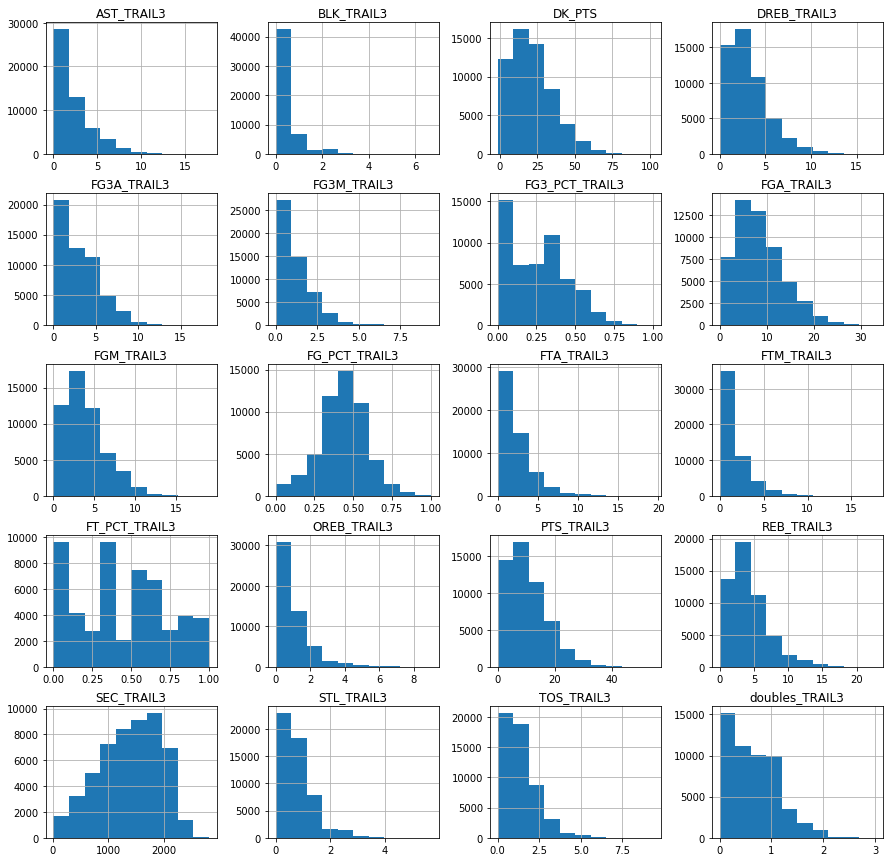

In [10]:
stats_sub = stats_sub.astype(float)
stats_sub_transform = stats_sub_transform.astype(float)

fig = plt.figure(figsize=(15,15))
ax = fig.gca()
stats_sub.hist(ax = ax);

plt.savefig('fig1_untransformed_variables.jpg')

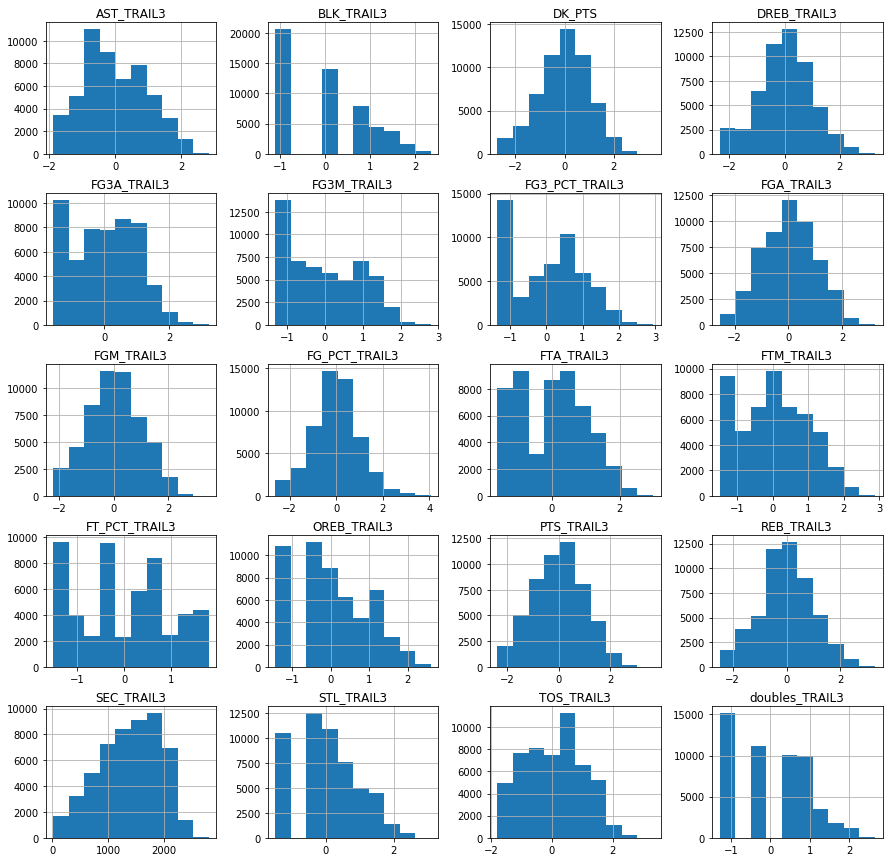

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(15,15))
ax = fig.gca()
stats_sub_transform[all_vars].hist(ax = ax);
plt.savefig('fig2_transformed_variables.jpg')

# Base Model

In [12]:
lm_attempt1 = stats_sub_transform[all_vars]
lm_attempt1.dropna(inplace = True)

outcome = 'DK_PTS'
Y = lm_attempt1[['DK_PTS']]
Y.reset_index(drop = True, inplace = True)
predictors = lm_attempt1.drop('DK_PTS', axis=1)
predictors.reset_index(drop = True, inplace = True)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [44]:
X_train, X_test, y_train, y_test = train_test_split(predictors, Y, test_size=0.30, random_state=34567)

In [45]:
train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

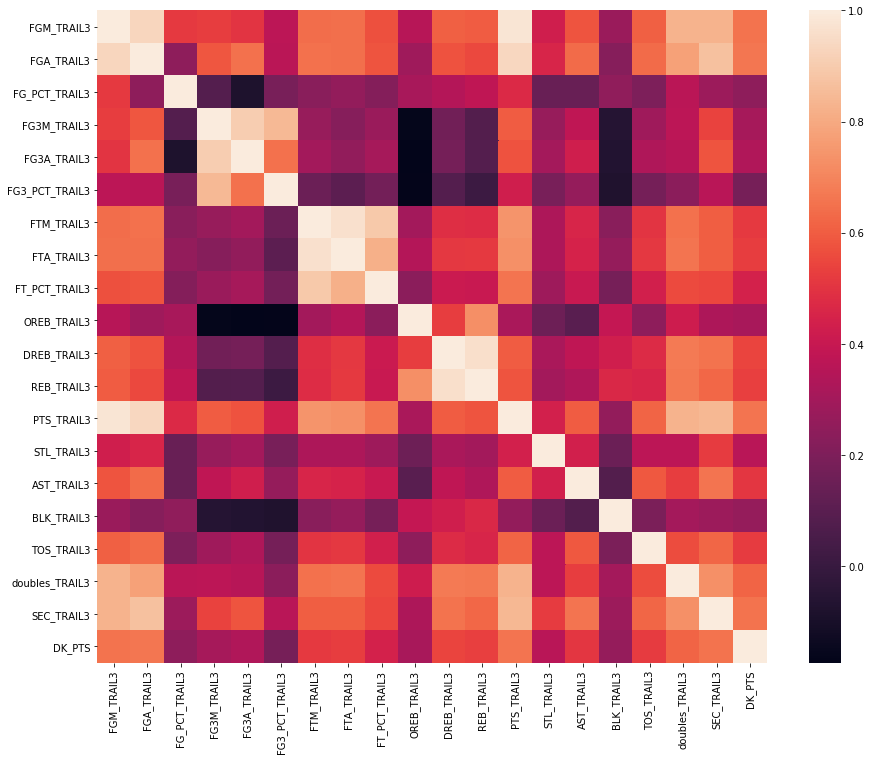

In [73]:
corr_train = train_data.corr()
fig = plt.figure(figsize = (15, 12))
ax = fig.gca()
sns.heatmap(corr_train, ax = ax)
plt.savefig('fig3_correlation_matrix_all_variables.jpg')

In [20]:
corr_unstacked = corr_train.unstack()
sorted_corr = corr_unstacked.sort_values(kind="quicksort")
corr_df = pd.DataFrame(sorted_corr)
corr_df.columns = ['correlation']
corr_df.reset_index(inplace = True)
pts = corr_df[(corr_df['level_0'] == 'PTS_TRAIL3') & (corr_df['correlation'] < 1)].sort_values(by = 'correlation', ascending = False)
# pts_ = corr_df[(corr_df['level_0'] == 'PTS') & (corr_df['correlation'] < 1)].sort_values(by = 'correlation', ascending = False)
fga = corr_df[(corr_df['level_0'] == 'FGA_TRAIL3') & (corr_df['correlation'] < 1)].sort_values(by = 'correlation', ascending = False)
reb = corr_df[(corr_df['level_0'] == 'REB_TRAIL3') & (corr_df['correlation'] < 1)].sort_values(by = 'correlation', ascending = False)
ast = corr_df[(corr_df['level_0'] == 'AST_TRAIL3') & (corr_df['correlation'] < 1)].sort_values(by = 'correlation', ascending = False)
blk = corr_df[(corr_df['level_0'] == 'BLK_TRAIL3') & (corr_df['correlation'] < 1)].sort_values(by = 'correlation', ascending = False)
dk_pts = corr_df[(corr_df['level_0'] == 'DK_PTS') & (corr_df['correlation'] < 1)].sort_values(by = 'correlation', ascending = False)
sec = corr_df[(corr_df['level_0'] == 'SEC_TRAIL3') & (corr_df['correlation'] < 1)].sort_values(by = 'correlation', ascending = False)

In [21]:
# pts.reset_index(inplace = True, drop = True)
pts.reset_index(inplace = True, drop = True)
fga.reset_index(inplace = True, drop = True)
reb.reset_index(inplace = True, drop = True)
ast.reset_index(inplace = True, drop = True)
blk.reset_index(inplace = True, drop = True)
dk_pts.reset_index(inplace = True, drop = True)
sec.reset_index(inplace = True, drop = True)

In [22]:
formula

'DK_PTS~FGM_TRAIL3+FGA_TRAIL3+FG_PCT_TRAIL3+FG3M_TRAIL3+FG3A_TRAIL3+FG3_PCT_TRAIL3+FTM_TRAIL3+FTA_TRAIL3+FT_PCT_TRAIL3+OREB_TRAIL3+DREB_TRAIL3+REB_TRAIL3+PTS_TRAIL3+STL_TRAIL3+AST_TRAIL3+BLK_TRAIL3+TOS_TRAIL3+doubles_TRAIL3+SEC_TRAIL3'

In [46]:
train_data = train_data.astype(float)

In [47]:
train_data.reset_index(inplace = True, drop = True)
model = ols(formula=formula, data=train_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 DK_PTS   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     2012.
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:42:45   Log-Likelihood:                -38889.
No. Observations:               37006   AIC:                         7.782e+04
Df Residuals:                   36986   BIC:                         7.799e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.2876      0.023    -12.709      0.000      -0.332      -0.243
FGM_TRAIL3        -0.0409      0.044     -0.920      0.358      -0.128       0.046
FGA_TRAIL3         0.2016      0.020      9.889      0.000       0.162       0.242
FG_PCT_TRAIL3     -0.0199      0.007     -2.802      0.005      -0.034      -0.006
FG3M_TRAIL3       -0.0029      0.018     -0.163      0.870      -0.038       0.032
FG3A_TRAIL3       -0.0491      0.013     -3.741      0.000      -0.075      -0.023
FG3_PCT_TRAIL3    -0.0263      0.008     -3.183      0.001      -0.042      -0.010
FTM_TRAIL3         0.0419      0.023      1.823      0.068      -0.003       0.087
FTA_TRAIL3         0.0233      0.015      1.531      0.126      -0.007       0.053
FT_PCT_TRAIL3     -0.0420      0.009     -4.849      0.000      -0.059      -0.025
OREB_TRAIL3        0.0521      0.013      3.949      0.000       0.026       0.078
DREB_TRAIL3        0.1992      0.032      6.166      0.000       0.136       0.263
REB_TRAIL3        -0.0987      0.040     -2.442      0.015      -0.178      -0.019
PTS_TRAIL3         0.1910      0.055      3.486      0.000       0.084       0.298
STL_TRAIL3         0.0135      0.004      3.156      0.002       0.005       0.022
AST_TRAIL3         0.0993      0.005     18.855      0.000       0.089       0.110
BLK_TRAIL3         0.0351      0.004      8.440      0.000       0.027       0.043
TOS_TRAIL3         0.0671      0.005     13.249      0.000       0.057       0.077
doubles_TRAIL3     0.0452      0.008      5.609      0.000       0.029       0.061
SEC_TRAIL3         0.0002   1.62e-05     14.173      0.000       0.000       0.000
==============================================================================
Omnibus:                       98.840   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.182
Skew:                          -0.088   Prob(JB):                     1.96e-24
Kurtosis:                       3.199   Cond. No.                     2.91e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_train, model.predict(X_train)))

NameError: name 'y_train' is not defined

In [59]:
y_train.max() - y_train.min()

DK_PTS    6.278062
dtype: float64

# Second Model

In [13]:
lm_attempt2 = stats_sub_transform[vars_of_interest]
lm_attempt2.dropna(inplace = True)

outcome = 'DK_PTS'
Y2 = lm_attempt2[['DK_PTS']]
Y2.reset_index(drop = True, inplace = True)
predictors2 = lm_attempt2.drop('DK_PTS', axis=1)
predictors2.reset_index(drop = True, inplace = True)
pred_sum = "+".join(predictors2.columns)
formula = outcome + "~" + pred_sum

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(predictors2, Y2, test_size=0.30, random_state=34567)

In [15]:
train_data2 = pd.concat([X_train2, y_train2], axis = 1)
test_data2 = pd.concat([X_test2, y_test2], axis = 1)

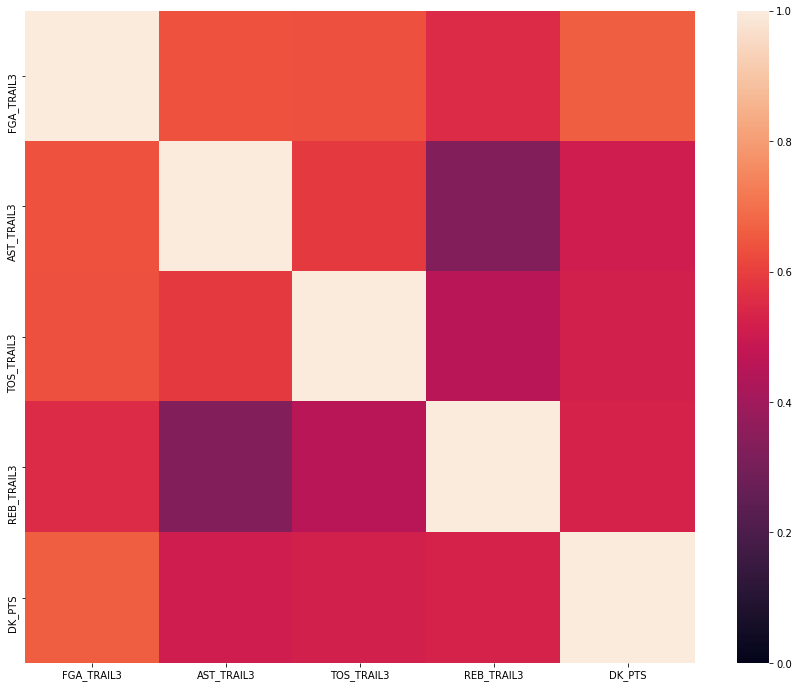

In [74]:
corr_train2 = train_data2.corr()
fig = plt.figure(figsize = (15, 12))
ax = fig.gca()
sns.heatmap(corr_train2, vmin = 0, vmax = 1, ax = ax)
plt.savefig('fig4_correlation_matrix_final_vars.jpg')

In [16]:
train_data2.reset_index(inplace = True, drop = True)
model = ols(formula=formula, data=train_data2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 DK_PTS   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     9079.
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        09:12:56   Log-Likelihood:                -39367.
No. Observations:               37006   AIC:                         7.874e+04
Df Residuals:                   37001   BIC:                         7.879e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0292      0.004      8.009      0.000       0.022       0.036
FGA_TRAIL3     0.3936      0.006     69.915      0.000       0.383       0.405
AST_TRAIL3     0.1244      0.005     24.855      0.000       0.115       0.134
TOS_TRAIL3     0.0879      0.005     17.376      0.000       0.078       0.098
REB_TRAIL3     0.2245      0.004     50.419      0.000       0.216       0.233
==============================================================================
Omnibus:                      122.993   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.209
Skew:                          -0.112   Prob(JB):                     1.96e-29
Kurtosis:                       3.190   Cond. No.                         2.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
y_train2.describe()

,DK_PTS
count,37006.000000
mean,0.030864
std,0.986886
min,-2.730276
25%,-0.631237
50%,0.071442
75%,0.718694
max,3.547786


In [54]:
np.sqrt(metrics.mean_squared_error(y_train2, model.predict(X_train2)))

0.701080275840492

In [60]:
y_train2.max() - y_train2.min()

DK_PTS    6.278062
dtype: float64

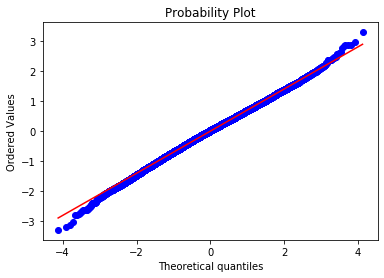

In [78]:
figure = plt.figure()
ax = figure.gca()
stats.probplot(model.resid, dist = 'norm', plot = ax)
plt.savefig('fig5_final_model_residuals.jpg')

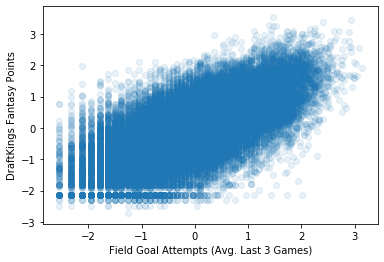

In [63]:
plt.scatter(train_data2['FGA_TRAIL3'], train_data2['DK_PTS'], alpha = 0.1)
plt.xlabel('Field Goal Attempts (Avg. Last 3 Games)')
plt.ylabel('DraftKings Fantasy Points')
plt.savefig('Images/fig6_FGA_DK_scatter.jpg')

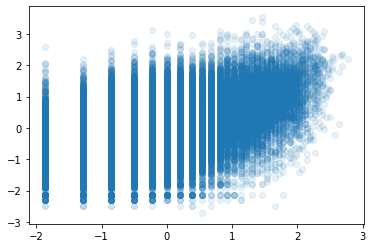

In [28]:
plt.scatter(train_data2['AST_TRAIL3'], train_data2['DK_PTS'], alpha = 0.1)

In [31]:
stats_sub['AST_TRAIL3'].value_counts()

0.6666666666666666    5679
1.0                   5388
0.3333333333333333    5145
1.3333333333333333    4867
1.6666666666666667    4140
2.0                   3578
0.0                   3420
2.3333333333333335    3030
2.6666666666666665    2512
3.0                   2067
3.3333333333333335    1765
3.6666666666666665    1521
4.0                   1399
4.333333333333333     1119
4.666666666666667      962
5.0                    875
5.333333333333333      818
5.666666666666667      664
6.0                    548
6.333333333333333      480
6.666666666666667      456
7.0                    385
7.333333333333333      346
7.666666666666667      272
8.0                    259
8.666666666666666      203
8.333333333333334      188
9.0                    155
9.333333333333334      128
9.666666666666666       87
10.0                    79
10.666666666666666      64
10.333333333333334      58
11.333333333333334      50
11.0                    38
12.0                    29
11.666666666666666      26
1

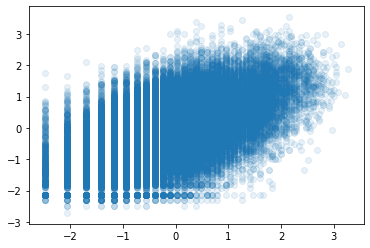

In [29]:
plt.scatter(train_data2['REB_TRAIL3'], train_data2['DK_PTS'], alpha = 0.1)

In [32]:
stats_sub['REB_TRAIL3'].value_counts()

2.6666666666666665    3030
2.3333333333333335    3011
3.0                   2975
2.0                   2954
3.3333333333333335    2858
3.6666666666666665    2777
1.6666666666666667    2730
4.0                   2527
1.3333333333333333    2432
4.333333333333333     2351
4.666666666666667     2201
1.0                   2067
5.0                   1935
5.333333333333333     1760
0.6666666666666666    1726
5.666666666666667     1598
6.0                   1428
6.333333333333333     1180
0.3333333333333333    1129
6.666666666666667     1099
7.0                    995
7.333333333333333      875
7.666666666666667      722
8.0                    663
8.333333333333334      632
0.0                    601
8.666666666666666      542
9.0                    437
9.333333333333334      416
9.666666666666666      373
                      ... 
12.666666666666666     124
13.0                   112
13.666666666666666      99
13.333333333333334      99
14.0                    76
14.333333333333334      67
1

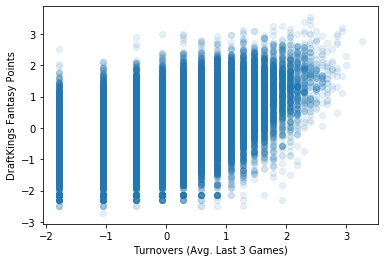

In [66]:
plt.scatter(train_data2['TOS_TRAIL3'], train_data2['DK_PTS'], alpha = 0.1)
plt.xlabel('Turnovers (Avg. Last 3 Games)')
plt.ylabel('DraftKings Fantasy Points')
plt.savefig('Images/fig7_TOS_DK_scatter.jpg')

In [35]:
stats_sub['TOS_TRAIL3'].value_counts()

0.6666666666666666    8164
0.3333333333333333    7680
1.0                   7478
1.3333333333333333    6358
1.6666666666666667    4971
0.0                   4920
2.0                   3803
2.3333333333333335    2786
2.6666666666666665    2091
3.0                   1424
3.3333333333333335    1040
3.6666666666666665     691
4.0                    459
4.333333333333333      331
4.666666666666667      228
5.0                    158
5.333333333333333       96
5.666666666666667       77
6.0                     51
6.333333333333333       28
6.666666666666667       12
7.0                     10
7.333333333333333        6
7.666666666666667        2
9.333333333333334        1
9.0                      1
Name: TOS_TRAIL3, dtype: int64

In [17]:
test_data2.reset_index(inplace = True, drop = True)
model_test = ols(formula=formula, data=test_data2).fit()
model_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 DK_PTS   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     3795.
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        09:13:37   Log-Likelihood:                -16969.
No. Observations:               15860   AIC:                         3.395e+04
Df Residuals:                   15855   BIC:                         3.399e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0311      0.006      5.545      0.000       0.020       0.042
FGA_TRAIL3     0.3861      0.009     44.589      0.000       0.369       0.403
AST_TRAIL3     0.1247      0.008     16.351      0.000       0.110       0.140
TOS_TRAIL3     0.0922      0.008     11.906      0.000       0.077       0.107
REB_TRAIL3     0.2241      0.007     32.627      0.000       0.211       0.238
==============================================================================
Omnibus:                       67.598   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.356
Skew:                          -0.126   Prob(JB):                     1.18e-16
Kurtosis:                       3.218   Cond. No.                         2.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
np.sqrt(metrics.mean_squared_error(y_test2, model.predict(X_test2)))

0.7054027492965578

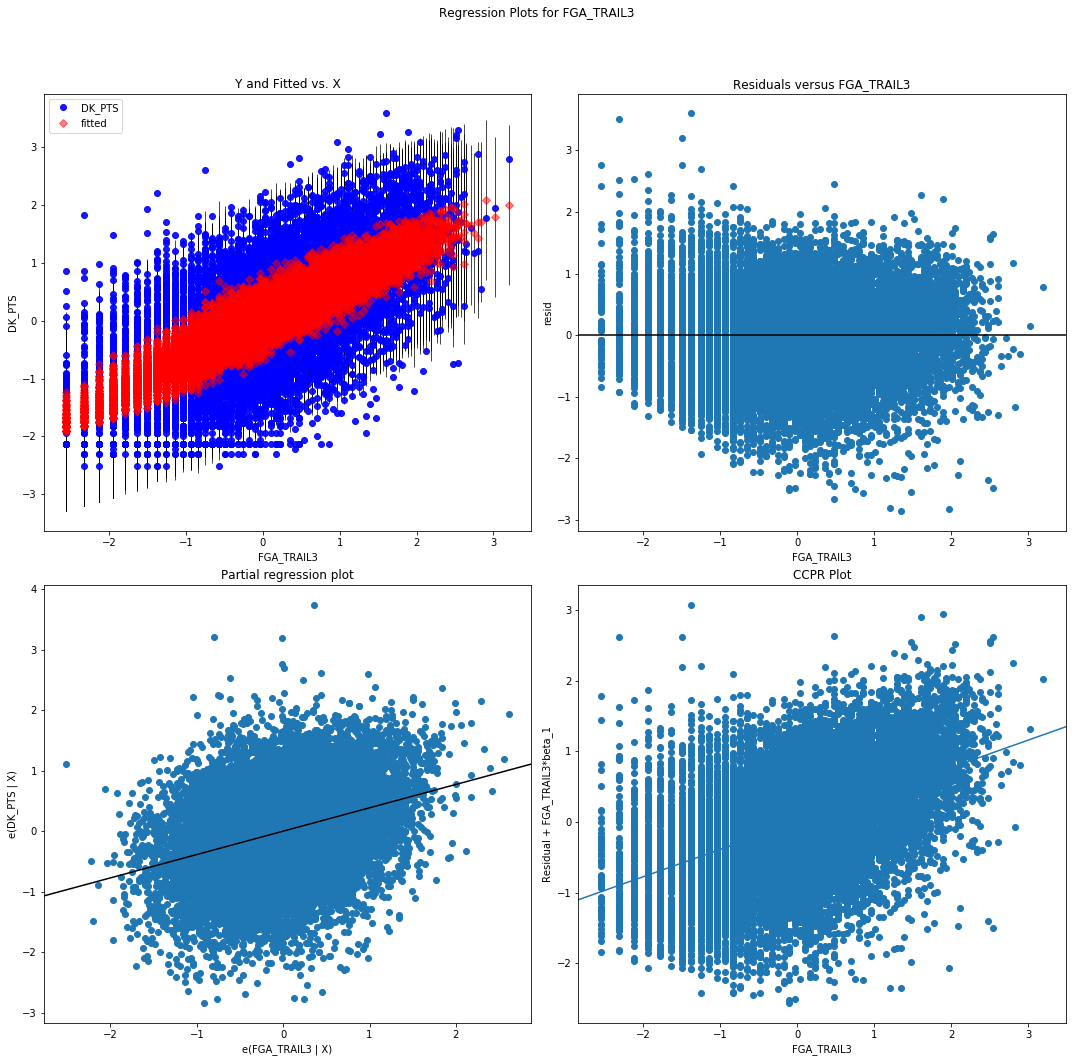

In [23]:
fig = plt.figure(figsize = (15, 15))
fig = sm.graphics.plot_regress_exog(model_test, "FGA_TRAIL3", fig=fig)
plt.savefig('fig8_partial_regress_test.jpg')

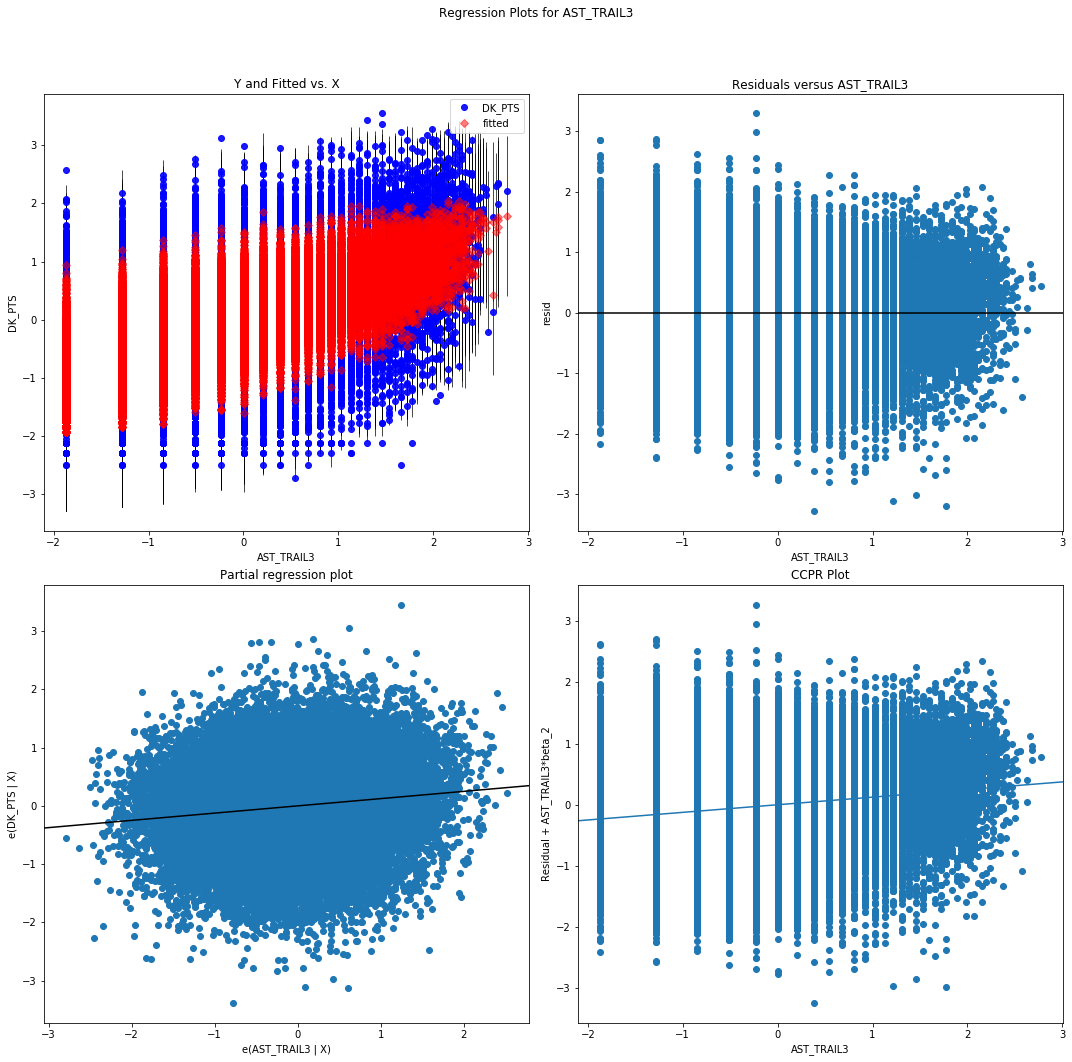

In [45]:
fig = plt.figure(figsize = (15, 15))
fig = sm.graphics.plot_regress_exog(model, "AST_TRAIL3", fig=fig)

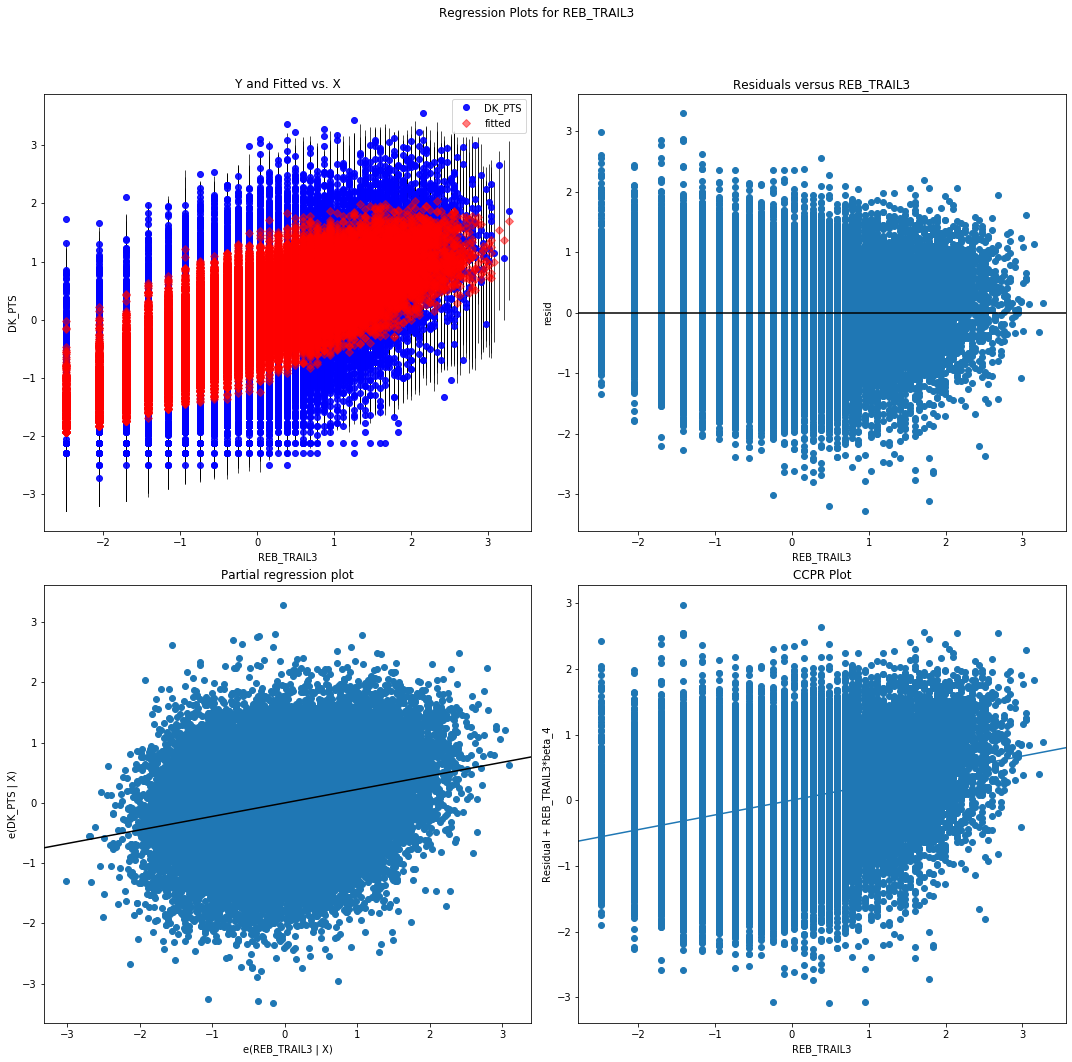

In [46]:
fig = plt.figure(figsize = (15, 15))
fig = sm.graphics.plot_regress_exog(model, "REB_TRAIL3", fig=fig)

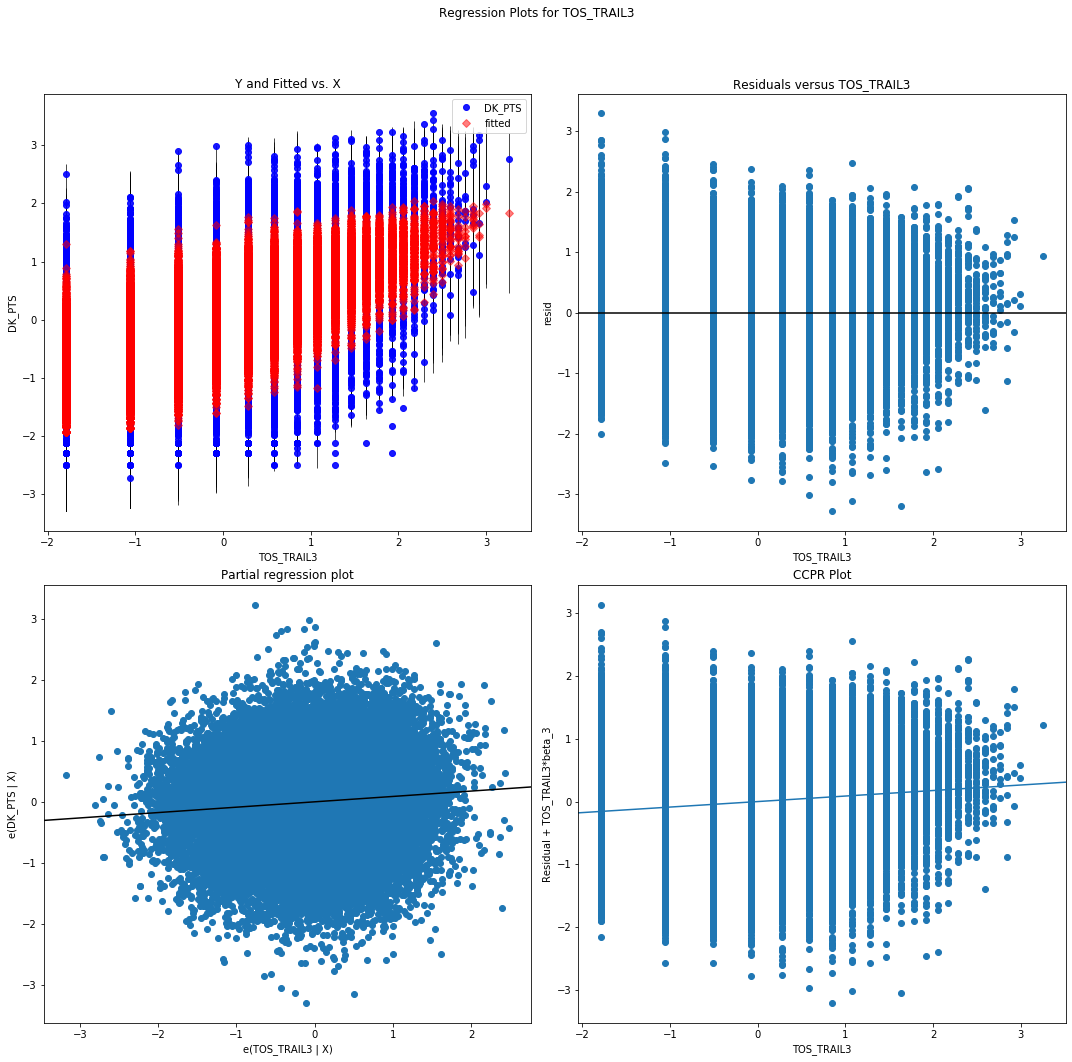

In [47]:
fig = plt.figure(figsize = (15, 15))
fig = sm.graphics.plot_regress_exog(model, "TOS_TRAIL3", fig=fig)

In [75]:
model = ols(formula='DK_PTS~AST_TRAIL3 + REB_TRAIL3', data=train_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 DK_PTS   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                 1.265e+04
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:44:43   Log-Likelihood:                -42382.
No. Observations:               37006   AIC:                         8.477e+04
Df Residuals:                   37003   BIC:                         8.480e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0294      0.004      7.436      0.000       0.022       0.037
AST_TRAIL3     0.3687      0.004     87.905      0.000       0.361       0.377
REB_TRAIL3     0.4018      0.004     95.973      0.000       0.394       0.410
==============================================================================
Omnibus:                       90.201   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.665
Skew:                          -0.119   Prob(JB):                     2.05e-20
Kurtosis:                       2.952   Cond. No.                         1.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Run model on test data

In [85]:
test_data2.reset_index(inplace = True, drop = True)
model = ols(formula=formula, data=test_data2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 DK_PTS   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     3795.
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:55:17   Log-Likelihood:                -16969.
No. Observations:               15860   AIC:                         3.395e+04
Df Residuals:                   15855   BIC:                         3.399e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0311      0.006      5.545      0.000       0.020       0.042
FGA_TRAIL3     0.3861      0.009     44.589      0.000       0.369       0.403
AST_TRAIL3     0.1247      0.008     16.351      0.000       0.110       0.140
TOS_TRAIL3     0.0922      0.008     11.906      0.000       0.077       0.107
REB_TRAIL3     0.2241      0.007     32.627      0.000       0.211       0.238
==============================================================================
Omnibus:                       67.598   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.356
Skew:                          -0.126   Prob(JB):                     1.18e-16
Kurtosis:                       3.218   Cond. No.                         2.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""